In [3]:
import pandas as pd
import numpy as np

# Tạo DataFrame minh họa
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500]
}

df = pd.DataFrame(data)

# Chuẩn hóa z-score cho mỗi cột
df_normalized = (df - df.mean()) / df.std()

print("Dữ liệu gốc:")
print(df)
print("\nDữ liệu đã chuẩn hóa:")
print(df_normalized)

Dữ liệu gốc:
   A   B    C
0  1  10  100
1  2  20  200
2  3  30  300
3  4  40  400
4  5  50  500

Dữ liệu đã chuẩn hóa:
          A         B         C
0 -1.264911 -1.264911 -1.264911
1 -0.632456 -0.632456 -0.632456
2  0.000000  0.000000  0.000000
3  0.632456  0.632456  0.632456
4  1.264911  1.264911  1.264911


In [4]:
import pandas as pd
import numpy as np

# Tạo DataFrame minh họa
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500]
}

df = pd.DataFrame(data)

# Chuẩn hóa normalization cho mỗi cột trong DataFrame
normalized_df = df.apply(lambda x: x / np.sqrt(np.sum(x**2)), axis=0)

print("DataFrame gốc:")
print(df)
print("\nDataFrame đã chuẩn hóa normalization:")
print(normalized_df)


DataFrame gốc:
   A   B    C
0  1  10  100
1  2  20  200
2  3  30  300
3  4  40  400
4  5  50  500

DataFrame đã chuẩn hóa normalization:
         A        B        C
0  0.13484  0.13484  0.13484
1  0.26968  0.26968  0.26968
2  0.40452  0.40452  0.40452
3  0.53936  0.53936  0.53936
4  0.67420  0.67420  0.67420


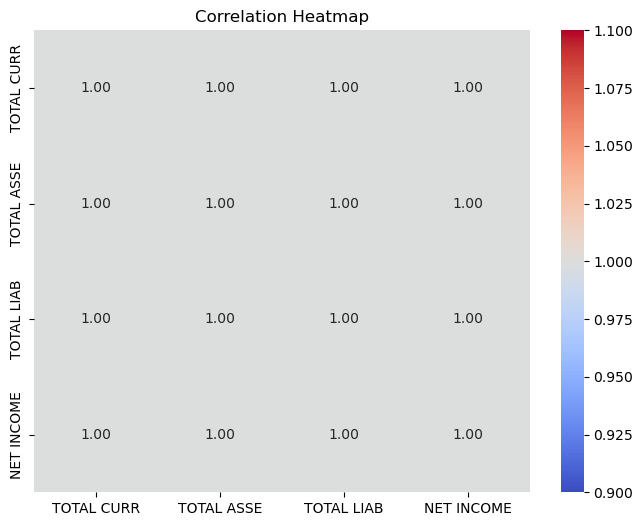

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset (replace this with your own data)
data = {
    'TOTAL CURRENT ASSET': [1, 2, 3, 4, 5],
    'TOTAL ASSET': [2, 3, 4, 5, 6],
    'TOTAL LIABILITIES': [3, 4, 5, 6, 7],
    'NET INCOME': [4, 5, 6, 7, 8]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Extract the first 10 characters of column names
column_names = [col[:10] for col in df.columns]

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=column_names, yticklabels=column_names)
plt.title('Correlation Heatmap')
plt.show()


In [6]:
# Assuming you have a DataFrame named 'df' with columns 'x' and 'y'
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.show()


KeyError: 'x'

In [1]:
# Importing necessary libraries
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generating a sample dataset (you would use your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the SVC classifier
classifier = svm.SVC()

# Training the classifier on the training data
classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = classifier.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.845
